In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("wine_data.csv", header = None, usecols=[0,1,2])

In [7]:
df.columns=["Class label", "Alcohol", "Malic acid"]

In [9]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

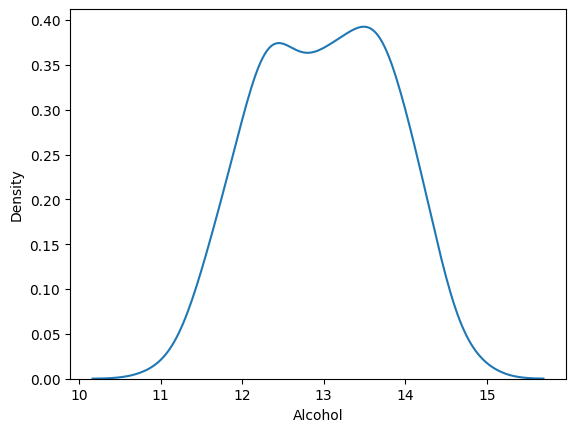

In [10]:
sns.kdeplot(data = df, x = "Alcohol")

<Axes: xlabel='Malic acid', ylabel='Density'>

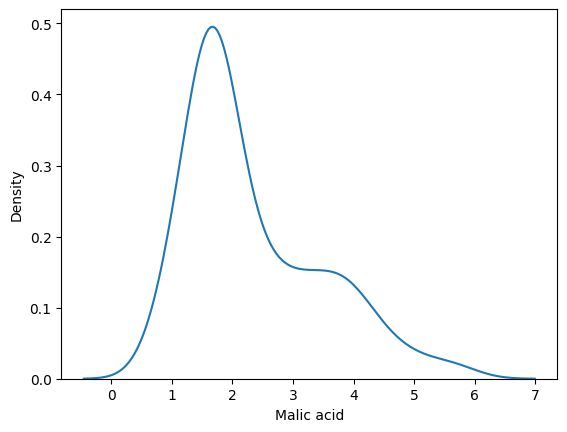

In [11]:
sns.kdeplot(data = df, x = "Malic acid")

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

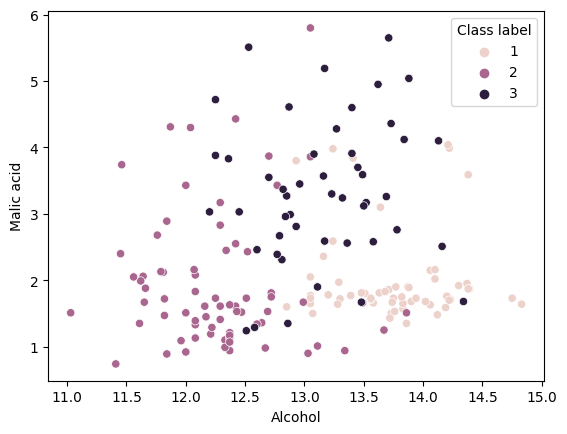

In [13]:
sns.scatterplot(data = df, x = "Alcohol", y = "Malic acid", hue =  "Class label")

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

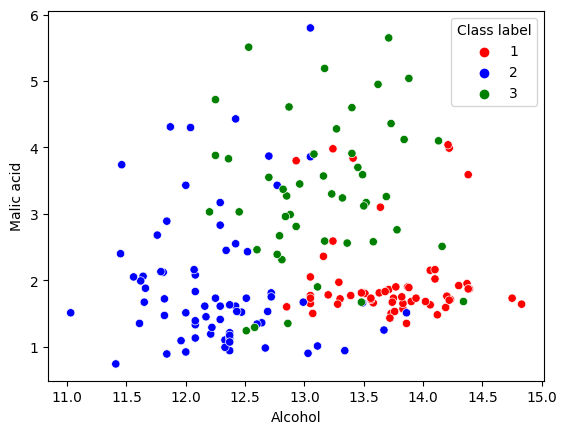

In [14]:
color_dict = {1: "red", 3: "green", 2: "blue"}
sns.scatterplot(data = df, x = "Alcohol", y = "Malic acid", hue =  "Class label", palette= color_dict)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Class label", axis = 1), df["Class label"], test_size= 0.3, random_state= 0)

In [18]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [25]:
np.round(X_test.describe(),1)

,Alcohol,Malic acid
count,54.0,54.0
mean,13.0,2.2
std,0.8,1.1
min,11.4,0.7
25%,12.4,1.6
50%,13.0,1.8
75%,13.7,2.7
max,14.8,5.8


In [27]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [28]:
np.round(X_test_scaled.describe(),1)

,Alcohol,Malic acid
count,54.0,54.0
mean,0.5,0.3
std,0.2,0.2
min,0.1,-0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


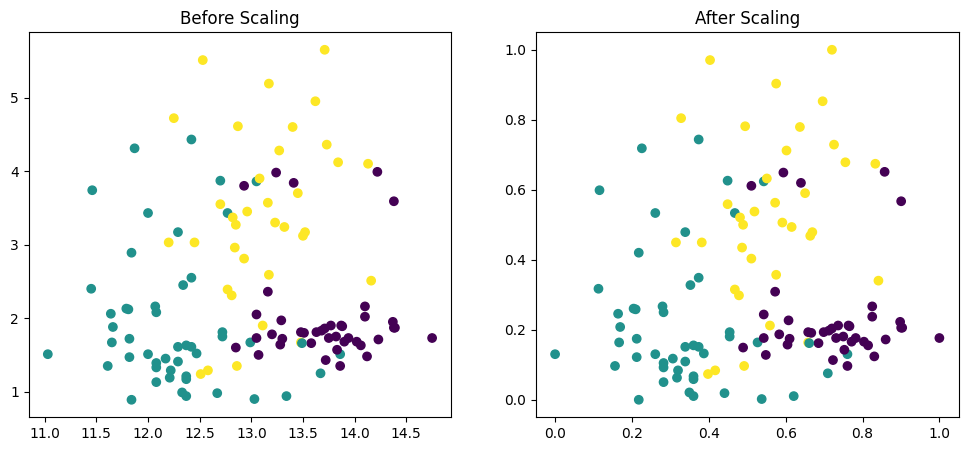

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.scatter(X_train["Alcohol"], X_train["Malic acid"], c = y_train)
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["Alcohol"], X_train_scaled["Malic acid"], c = y_train)
ax2.set_title("After Scaling")
plt.show()

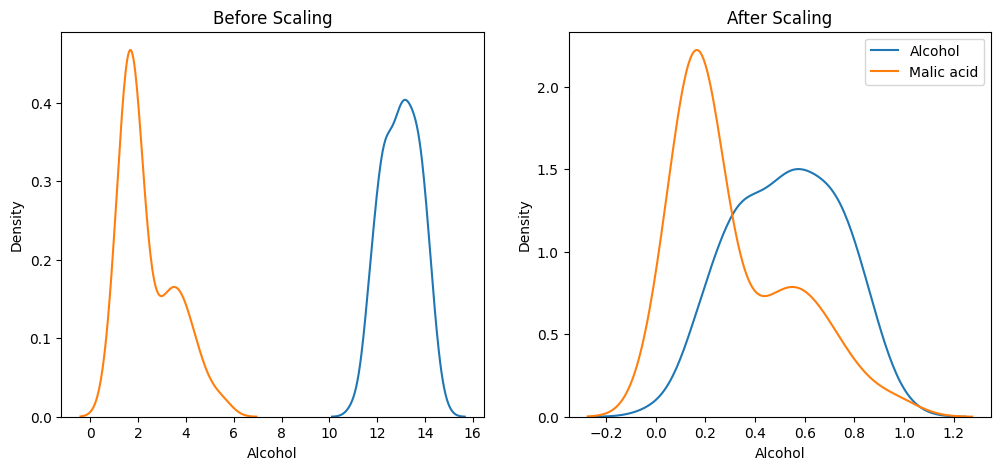

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

### before scaling 
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Alcohol"], ax = ax1, label = "Alcohol")
sns.kdeplot(X_train["Malic acid"], ax = ax1, label = "Malic acid")

### after Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Alcohol"], ax = ax2, label = "Alcohol")
sns.kdeplot(X_train_scaled["Malic acid"], ax = ax2, label = "Malic acid")
plt.legend()
plt.show()

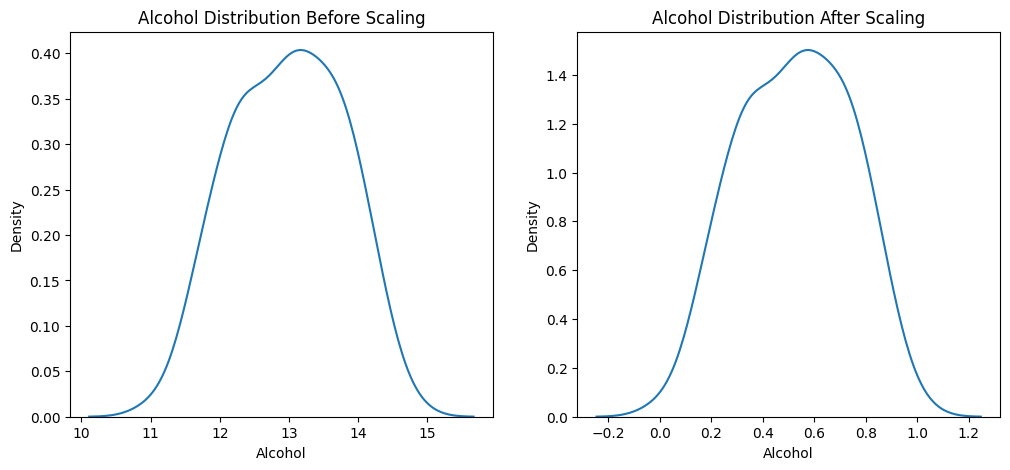

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

### before scaling 
ax1.set_title("Alcohol Distribution Before Scaling")
sns.kdeplot(X_train["Alcohol"], ax = ax1)


### after Scaling
ax2.set_title("Alcohol Distribution After Scaling")
sns.kdeplot(X_train_scaled["Alcohol"], ax = ax2)


plt.show()

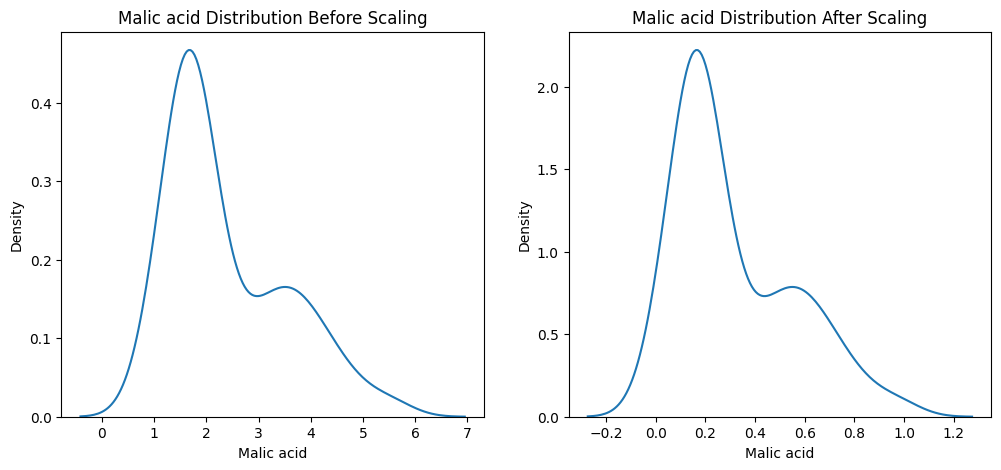

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

### before scaling 
ax1.set_title("Malic acid Distribution Before Scaling")
sns.kdeplot(X_train["Malic acid"], ax = ax1)


### after Scaling
ax2.set_title("Malic acid Distribution After Scaling")
sns.kdeplot(X_train_scaled["Malic acid"], ax = ax2)


plt.show()